<a href="https://colab.research.google.com/github/lailatulbadriyah24/2141720036-PCVK-2023/blob/main/Week07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Kelompok 6**
Lailatul Badriyah - 2141720036 - 14


---



### **Praktikum**

**1. Sinkronisasi dengan akun drive untuk mengakses data**

In [139]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**2. Import library**

In [140]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

**3. Membuat fungsi konvolusi**

In [141]:
# Membuat fungsi konvolusi
def convolution2d(image, kernel, stride, padding):

  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)

  return new_image

**4. Load citra yang akan diproses dan mengubahnya menjadi citra keabuan**

In [142]:
img = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

**5. Menentukan kernel yang akan digunakan**

In [143]:
# Kernel untuk operasi Sharpen
kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

**6. Memanggil fungsi konvolusi dan menerapkan setiap filter yang telah ditentukan**

**a. Sharpen**

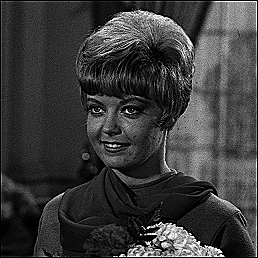

In [144]:
sharpened_image = convolution2d(img_gray,kernel_sharpen,1,2)

cv2_imshow(sharpened_image)

**b. Emboss**

In [145]:
# Kernel untuk operasi Emboss
kernel_emboss = np.array([[-2,-1,0],
                          [-1,1,1],
                          [0,1,2]])

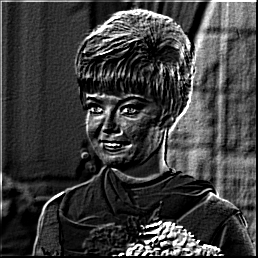

In [146]:
emboss_image = convolution2d(img_gray,kernel_emboss,1,2)
cv2_imshow(emboss_image)

**c. Left Sobel Edge Detection**

In [147]:
# Kernel untuk operasi Left Sobel Edge Detection
kernel_lsed = np.array([[1,0,-1],
                        [2,0,-2],
                        [1,0,-1]])

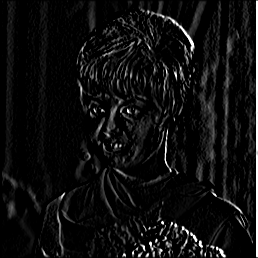

In [148]:
lsed_image = convolution2d(img_gray,kernel_lsed,1,2)
cv2_imshow(lsed_image)

**d. Canny Edge Detection**

In [149]:
# Kernel untuk operasi Canny Edge Detection
kernel_ced = np.array([[-1,-1,-1],
                       [-1,8,-1],
                       [-1,-1,-1]])

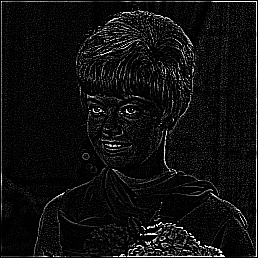

In [150]:
ced_image = convolution2d(img_gray,kernel_ced,1,2)
cv2_imshow(ced_image)

**e. Prewitt Edge Detection**

In [151]:
# Kernel untuk operasi Prewitt Edge Detection
kernel_ped = np.array([[-1,-1,-1],
                       [0,0,0],
                       [1,1,1]])

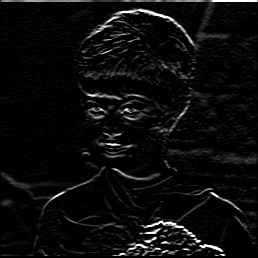

In [152]:
ped_image = convolution2d(img_gray,kernel_ped,1,2)
cv2_imshow(ped_image)

**f. 5x5 Gaussian Blur**

In [153]:
# Kernel untuk operasi Gaussian Blur 5x5
kernel_gaussian_blur = (1/256) * np.array([[1, 4, 6, 4, 1],
                                          [4, 16, 24, 16, 4],
                                          [6, 24, 36, 24, 6],
                                          [4, 16, 24, 16, 4],
                                          [1, 4, 6, 4, 1]])

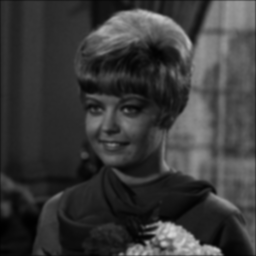

In [154]:
blurred_image = convolution2d(img_gray,kernel_gaussian_blur,1,2)
cv2_imshow(blurred_image)

**g. 21x21 Gaussian Blur**

In [155]:
# Menentukan ukuran kernel dan sigma
kernel_size = 21
sigma = math.sqrt(kernel_size)

# Membuat kernel Gaussian
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gaussian_blur_21_kernel = np.outer(gaussian_kernel, gaussian_kernel.transpose())

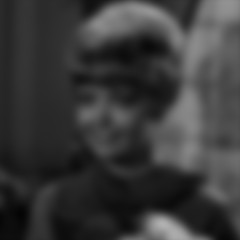

In [156]:
blurred_21_image = convolution2d(img_gray,gaussian_blur_21_kernel,1,2)
cv2_imshow(blurred_21_image)

### **Tugas**

Diketahui dataset KTP dengan kondisi citra yang berbeda. Lakukan perbaikan melalui implementasi teknik filterisasi dan detection setiap citra. Terapkan juga histogram equalization dan
operasi aritmatika sebagai Teknik pendukung perbaikan citra KTP.

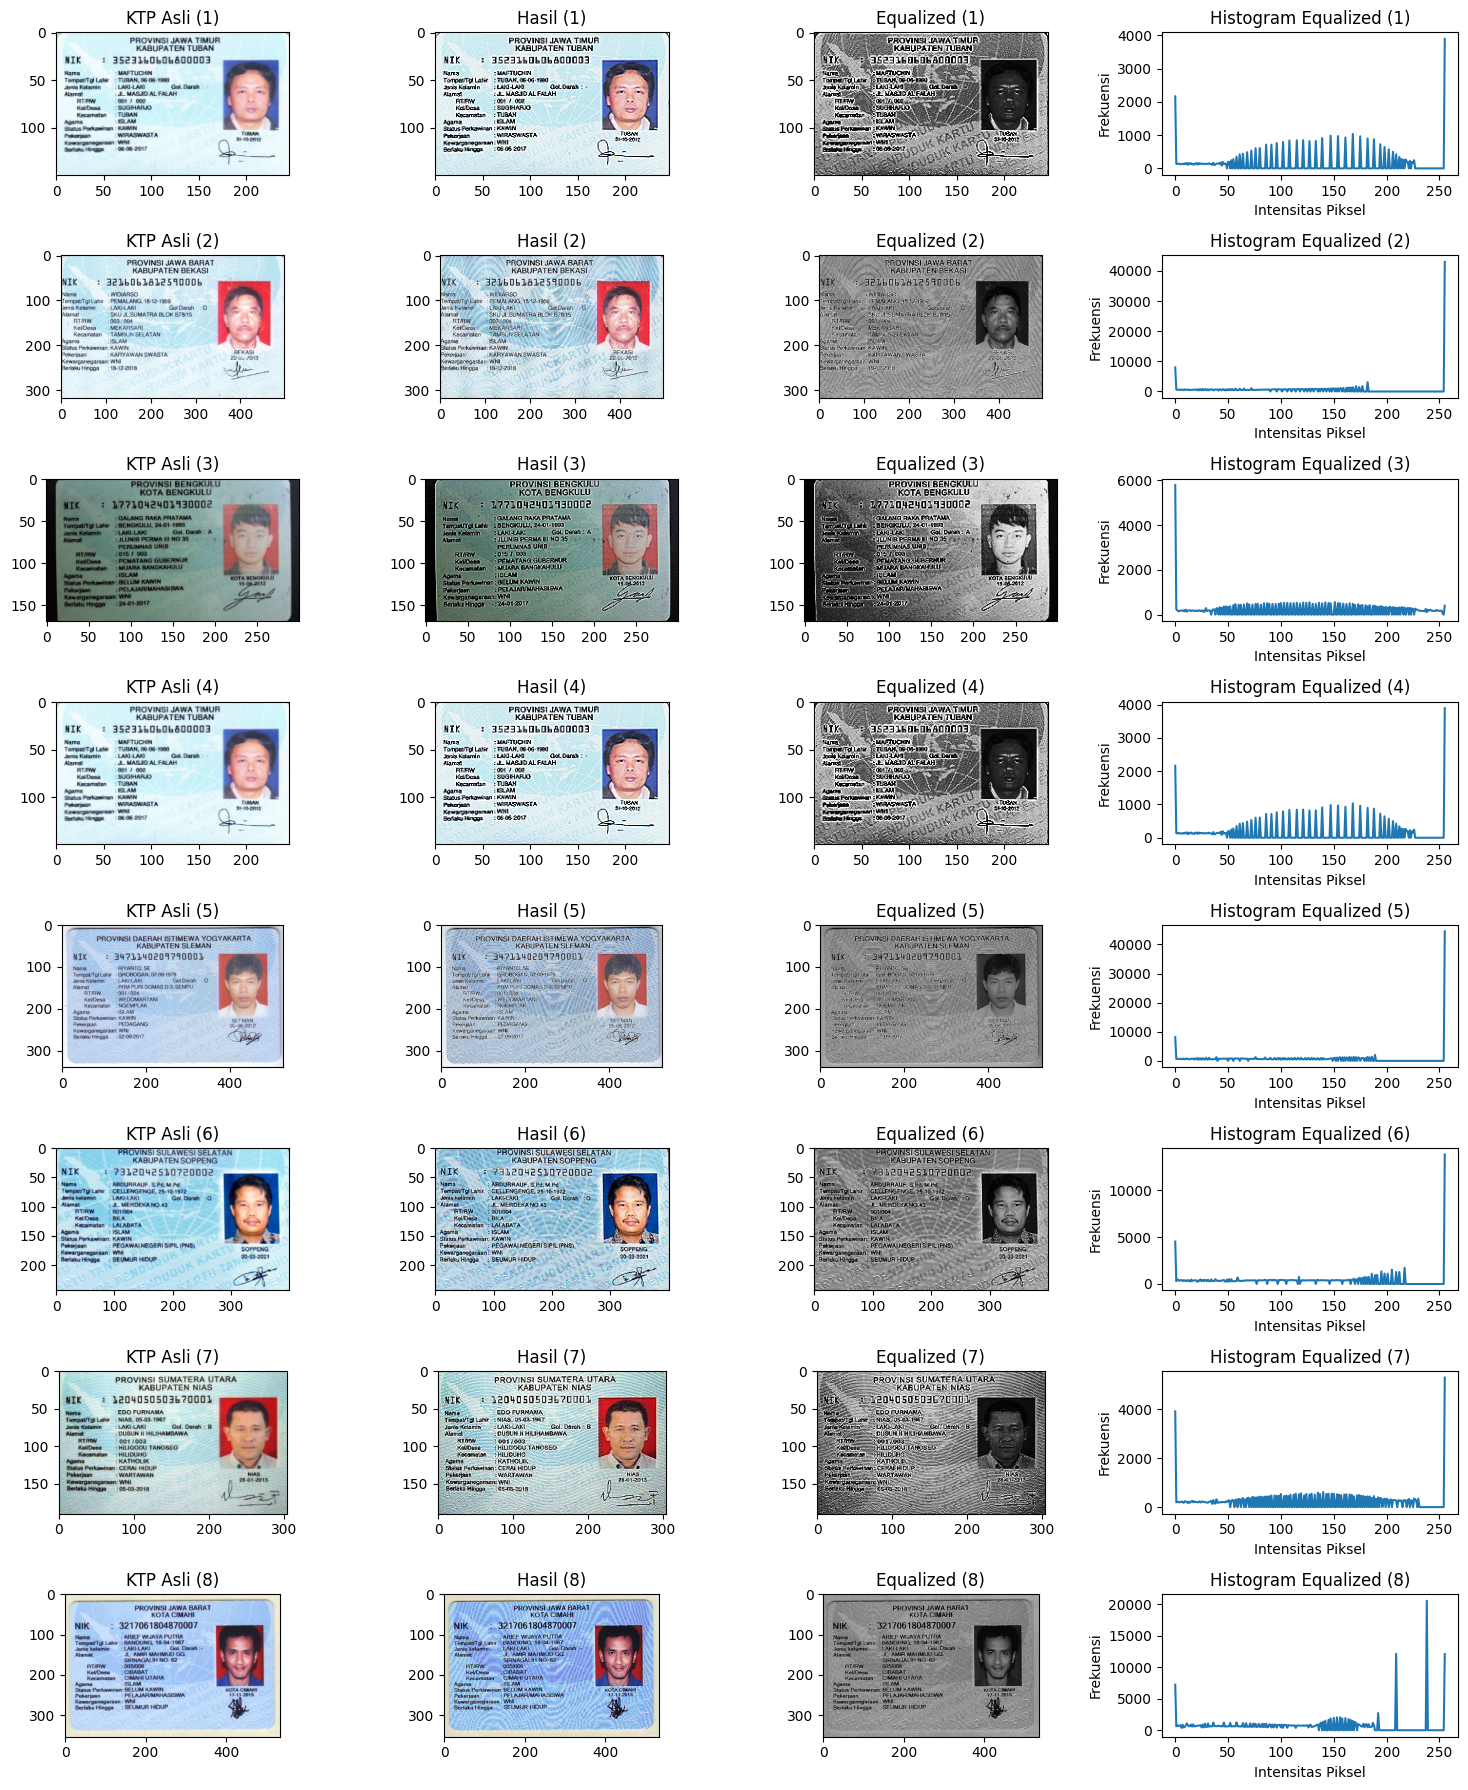

In [226]:
import os

# Fungsi untuk menyesuaikan kecerahan gambar menggunakan model warna HSV
def adjust_brightness(image, value):
    hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
    h, s, v = cv.split(hsv)
    v = cv.add(v, value)
    v = np.clip(v, 0, 255)
    hsv = cv.merge((h, s, v))
    return cv.cvtColor(hsv, cv.COLOR_HSV2BGR)

# Kernel untuk mengasah gambar
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

# Mengatur path folder gambar KTP
folder_path = '/content/drive/MyDrive/PCVK/ktp/'

# Mendapatkan daftar file gambar dalam folder dengan ekstensi yang sesuai
ktp_files = [file for file in os.listdir(folder_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Mengatur tampilan grid untuk menampilkan gambar
num_rows = len(ktp_files)
num_cols = 4
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 18))

# Iterasi melalui gambar-gambar KTP
for i, ktp_file in enumerate(ktp_files):
    ktp_path = os.path.join(folder_path, ktp_file)
    ktp_image = cv.imread(ktp_path)

    # Mengubah ukuran gambar KTP menjadi setengah ukuran aslinya
    ktp_image_resized = cv.resize(ktp_image, (0, 0), fx=0.5, fy=0.5)

    # Menerapkan penyesuaian kecerahan
    brightness_adjusted = adjust_brightness(ktp_image_resized, -10)

    # Menerapkan filter sharpen
    sharpened = cv.filter2D(brightness_adjusted, -1, sharpen_kernel)

    # Melakukan equalisasi histogram
    sharpened_gray = cv.cvtColor(sharpened, cv.COLOR_BGR2GRAY)
    equalized = cv.equalizeHist(sharpened_gray)
    equalized_color = cv.cvtColor(equalized, cv.COLOR_GRAY2BGR)

    # Menampilkan gambar asli dengan label
    axs[i, 0].imshow(cv.cvtColor(ktp_image_resized, cv.COLOR_BGR2RGB))
    axs[i, 0].set_title(f'KTP Asli ({i+1})')

    # Menampilkan gambar yang telah diolah dengan label
    axs[i, 1].imshow(cv.cvtColor(sharpened, cv.COLOR_BGR2RGB))
    axs[i, 1].set_title(f'Hasil ({i+1})')

    # Menampilkan gambar hasil equalisasi dengan label
    axs[i, 2].imshow(cv.cvtColor(equalized_color, cv.COLOR_BGR2RGB))
    axs[i, 2].set_title(f'Equalized ({i+1})')

    # Menghitung histogram dari gambar hasil equalisasi
    hist_equalized = cv.calcHist([equalized], [0], None, [256], [0, 256])

    # Menampilkan histogram pada kolom ke-4 dengan label
    axs[i, 3].plot(hist_equalized)
    axs[i, 3].set_title(f'Histogram Equalized ({i+1})')
    axs[i, 3].set_xlabel('Intensitas Piksel')
    axs[i, 3].set_ylabel('Frekuensi')

# Menampilkan hasil keseluruhan
plt.tight_layout()
plt.show()